<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Assignments/Assignment_3_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 3

Due EOD Tuesday Oct 1st

#Question 1

A nuclear fuel pellet is a cylinder, 1.5 cm in lenth and 1 cm in diameter. Assume the surface temperature is 300 C everywhere. Given temperature probe data below, determine the radial temperature profile in the middle of a nuclear fuel pellet (i.e.: T(r, z = 0.75)) using radial basis functions.


In [1]:
import numpy as np

# 20 data points presented in columns: | x | y | z | T |

data = np.array([
    [5.1690e-02, 2.3766e-01, 6.7059e-01, 5.2645e+02],
    [1.1353e-01, 9.4708e-02, 5.3856e-01, 5.5201e+02],
    [1.6676e-01, 1.4358e-01, 4.6936e-01, 5.0802e+02],
    [1.3610e-01, 3.7207e-02, 2.1694e-01, 4.3663e+02],
    [8.9225e-02, 3.7293e-01, 1.1270e+00, 3.9234e+02],
    [1.9001e-01, 3.7240e-01, 8.4774e-01, 3.8872e+02],
    [5.4849e-02, 3.5425e-01, 5.7478e-01, 4.3784e+02],
    [1.7001e-01, 2.0241e-01, 1.2960e+00, 4.0159e+02],
    [2.0606e-01, 3.1594e-01, 6.4077e-01, 4.2652e+02],
    [2.5382e-01, 2.5859e-01, 4.8610e-01, 4.2481e+02],
    [5.6038e-02, 8.2231e-02, 4.2029e-01, 5.3244e+02],
    [3.1242e-01, 8.0489e-02, 1.1530e+00, 4.2453e+02],
    [6.0186e-02, 4.4891e-01, 3.9941e-01, 3.4207e+02],
    [1.5070e-01, 3.4794e-01, 1.5595e-01, 3.4750e+02],
    [1.8215e-01, 3.4388e-01, 1.0478e+00, 3.9963e+02],
    [1.1633e-01, 4.1011e-01, 5.5001e-01, 3.7611e+02],
    [1.2377e-01, 3.3703e-01, 3.7672e-02, 3.1423e+02],
    [4.6378e-02, 3.3653e-01, 1.4434e+00, 3.2345e+02],
    [2.9063e-02, 3.2584e-02, 2.3977e-01, 4.5993e+02],
    [2.1162e-02, 3.8590e-01, 2.5905e-01, 3.6901e+02]
])

Consider what you know about this system. What extra information do you have in terms of

### a) type(s) of symmetry?

{answer}

Answer: 2 - azimuthal symmetry and mirror symmetry about the midplane

### b) Boundary conditions?
{answer}

Answer: We konw the boundary conditions are 300 C around the periphery. This data is not in the data points above and needs to be added in manually.

## c) Plot the best guess of the radial temperature gradient

WARNING: RBFs will fail with a linear solver error if two data points exactly overlap.

{Method, implementation, answer (2 points)}

##Answer

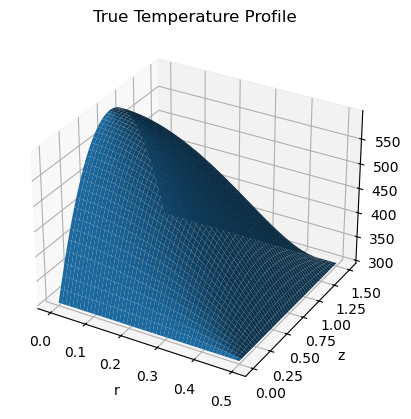

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def T_true(r, z):
  return 300 + 300*(1- (r / 0.5) ** 2) * (1 - ((z - 0.75) / 0.75) ** 2)

# Create a grid of r and z values
r = np.linspace(0, 0.5, 50)
z = np.linspace(0, 1.5, 50)
R, Z = np.meshgrid(r, z)

# Calculate the temperature at each point in the grid
T = T_true(R, Z)

# Create a 3D plot of the temperature profile
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(R, Z, T)
ax.set_xlabel('r')
ax.set_ylabel('z')
ax.set_zlabel('T')
ax.set_title('True Temperature Profile')

plt.show()

In [3]:
# make radial symmetry
dataR = np.sqrt(data[:,0]**2 + data[:,1]**2)
# make z symmetric about midplane
dataZ = abs(data[:,2] - 0.75)

# Data in R Z T columns
dataRZ = np.column_stack((dataR, dataZ, data[:,3]))


n = 10
data_BC_top = np.column_stack([np.linspace(0, 0.49, n), np.ones(n)*.75, np.ones(n)*300])
data_BC_side = np.column_stack([np.ones(n)*.5, np.linspace(0, 0.75, n), np.ones(n)*300])

dataRZ2 = np.vstack([dataRZ, data_BC_top, data_BC_side])

print(dataRZ2)


from scipy.interpolate import RBFInterpolator
rbf = RBFInterpolator(dataRZ2[:,:2], dataRZ2[:,2])

[[2.43216224e-01 7.94100000e-02 5.26450000e+02]
 [1.47846766e-01 2.11440000e-01 5.52010000e+02]
 [2.20054798e-01 2.80640000e-01 5.08020000e+02]
 [1.41094191e-01 5.33060000e-01 4.36630000e+02]
 [3.83455194e-01 3.77000000e-01 3.92340000e+02]
 [4.18073630e-01 9.77400000e-02 3.88720000e+02]
 [3.58471024e-01 1.75220000e-01 4.37840000e+02]
 [2.64335409e-01 5.46000000e-01 4.01590000e+02]
 [3.77198631e-01 1.09230000e-01 4.26520000e+02]
 [3.62344284e-01 2.63900000e-01 4.24810000e+02]
 [9.95097724e-02 3.29710000e-01 5.32440000e+02]
 [3.22621660e-01 4.03000000e-01 4.24530000e+02]
 [4.52926642e-01 3.50590000e-01 3.42070000e+02]
 [3.79173751e-01 5.94050000e-01 3.47500000e+02]
 [3.89142746e-01 2.97800000e-01 3.99630000e+02]
 [4.26289668e-01 1.99990000e-01 3.76110000e+02]
 [3.59037928e-01 7.12328000e-01 3.14230000e+02]
 [3.39710700e-01 6.93400000e-01 3.23450000e+02]
 [4.36620548e-02 5.10230000e-01 4.59930000e+02]
 [3.86479806e-01 4.90950000e-01 3.69010000e+02]
 [0.00000000e+00 7.50000000e-01 3.000000

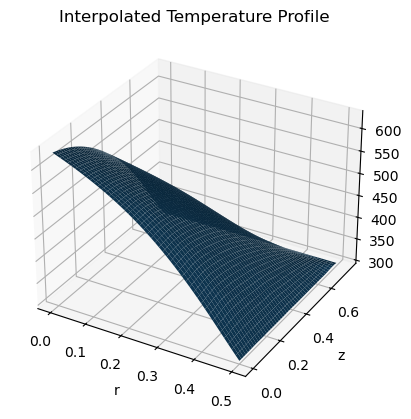

In [9]:
# prompt: plot rbf over dataR from 0 to .5, and dataZ from 0 to .75

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RBFInterpolator

# Assuming dataR and dataZ are defined as in the previous code

r_interp = np.linspace(0, 0.5, 50)
z_interp = np.linspace(0, 0.75, 50)
R_interp, Z_interp = np.meshgrid(r_interp, z_interp)

T_interp = rbf(np.column_stack((R_interp.flatten(), Z_interp.flatten()))).reshape(R_interp.shape)

# Create a 3D plot of the interpolated temperature profile
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(R_interp, Z_interp, T_interp)
ax.set_xlabel('r')
ax.set_ylabel('z')
ax.set_zlabel('T')
ax.set_title('Interpolated Temperature Profile')

plt.show()


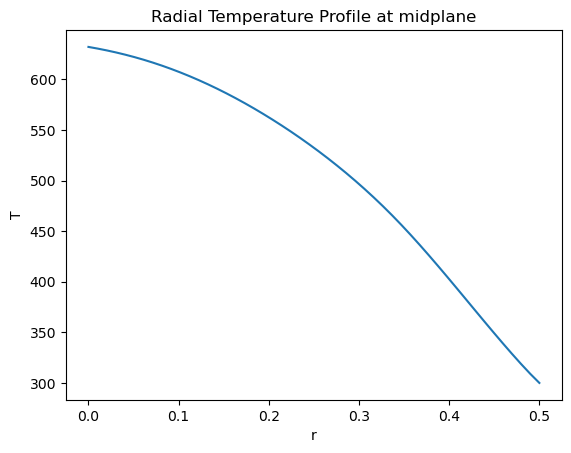

In [10]:
# prompt: Plot the temperature profile over R from 0 to .5 at z=0

import numpy as np
import matplotlib.pyplot as plt

# Assuming r_interp, z_interp, and T_interp are defined as in the previous code

# Find the index of z=0 in z_interp
z_0_index = np.argmin(np.abs(z_interp - 0))

# Extract the temperature profile at z=0
T_interp_z0 = T_interp[:, z_0_index]

# Plot the temperature profile
plt.plot(r_interp, T_interp_z0)
plt.xlabel('r')
plt.ylabel('T')
plt.title('Radial Temperature Profile at midplane')
plt.show()


The gradient is:

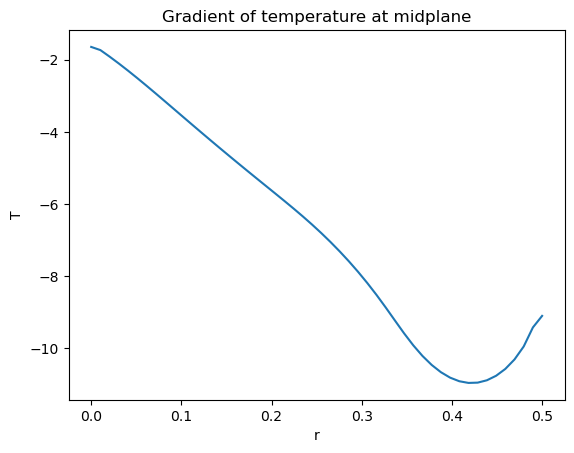

In [12]:
plt.plot(r_interp, np.gradient(T_interp_z0))
plt.xlabel('r')
plt.ylabel('T')
plt.title('Gradient of temperature at midplane')
plt.show()


# Question 2

You run an experiment and obtain the following data:

| x | y1 | y2 | y3 | y4 | y5 |
|---|---|---|---| --- | --- |
| 0.00 | -29.49 | -2.14 | 15.88 | 22.69 | 28.53 |
| 1.11 | 2.83 | 18.02 | -25.45 | -32.45 | 7.50 |
| 2.22 | 1.97 | -10.49 | -0.18 | -32.10 | -40.31 |
| 3.33 | -38.09 | -46.16 | -7.87 | -33.97 | -38.39 |
| 4.44 | -3.97 | -32.22 | -33.95 | -11.07 | -32.47 |
| 5.56 | 4.45 | -10.88 | 20.43 | 6.57 | -8.49 |
| 6.67 | 50.22 | 51.29 | 80.02 | 66.15 | 84.90 |
| 7.78 | 164.11 | 190.26 | 160.94 | 182.35 | 163.18 |
| 8.89 | 331.75 | 306.51 | 278.40 | 302.13 | 335.44 |
| 10.00 | 517.06 | 483.20 | 476.73 | 512.16 | 500.64 |



In [6]:
import numpy as np

# Define the table as a list of lists
d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])

## a) Determine the best cubic polynomial fit to this data with the uncertainty

{method, implementation, answer}

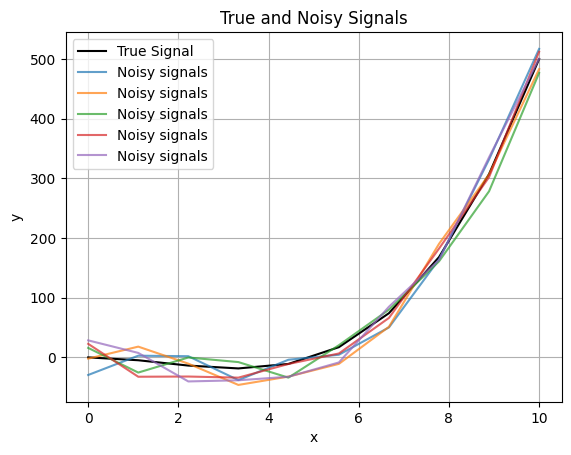

In [7]:
# prompt: plot the curve x^3-5x^2 from 0 to 10. For every step, sample it 5 times with uniform error. Plot the true and noisy signal. Assemble the x, and 5 noisy signals together

import numpy as np
import matplotlib.pyplot as plt

# Define the true function
def true_function(x):
  return x**3 - 5*x**2

# Generate x values
x = np.linspace(0, 10, 10)

# Calculate the true y values
y_true = true_function(x)

# # Create noisy signals
# noisy_signals = []
# for i in range(5):
#   noise = np.random.uniform(-30, 30, size=len(x))
#   y_noisy = y_true + noise
#   noisy_signals.append(y_noisy)

x, noisy_signals = d[:,0], d[:,1:]


# Plot the true signal
plt.plot(x, y_true, label='True Signal', color='black')


plt.plot(x,noisy_signals, label=f'Noisy signals', alpha = 0.7)

plt.xlabel('x')
plt.ylabel('y')
plt.title('True and Noisy Signals')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import numpy as np

# Assuming 'data' is defined as in the preceding code

# Calculate the mean of the last 5 columns
mean_last_5 = np.mean(d[:, -5:], axis=1)

# Calculate the variance of the last 5 columns
variance_last_5 = np.var(d[:, -5:], axis=1)
print(d[:,0])
print(mean_last_5)
print(variance_last_5)

# Create a table using the first column, mean, and variance
table_data = np.column_stack([d[:,0], mean_last_5, variance_last_5])


[ 0.    1.11  2.22  3.33  4.44  5.56  6.67  7.78  8.89 10.  ]
[  7.094  -5.91  -16.222 -32.896 -22.736   2.416  66.516 172.168 310.846
 497.958]
[440.717384 383.00876  290.698616 172.109904 159.741824 128.324304
 203.570824 140.555416 437.870904 248.440576]


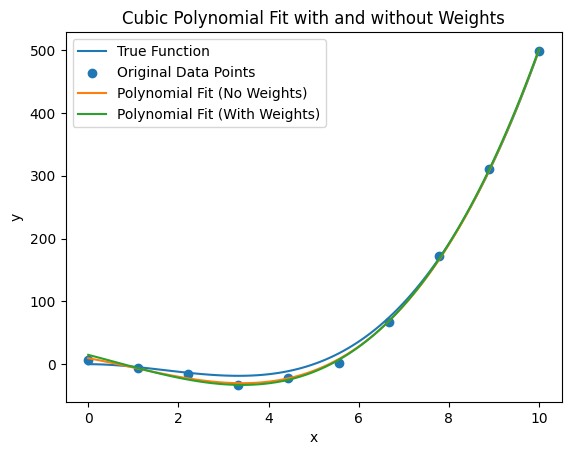

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = table_data[:, 0]
y_mean = table_data[:, 1]
y_std = table_data[:, 2]

# Cubic polynomial fit without weights
coeffs_no_weights = np.polyfit(x, y_mean, 3)
polynomial_no_weights = np.poly1d(coeffs_no_weights)

# Cubic polynomial fit with weights (using 1/std_dev as weight)
weights = 1 / y_std
coeffs_with_weights = np.polyfit(x, y_mean, 3, w=weights)
polynomial_with_weights = np.poly1d(coeffs_with_weights)

# Define the true function
def true_function(x):
  return x**3 - 5*x**2

# Generate x values for plotting
x_plot = np.linspace(0, 10, 100)

# Calculate the true function values
y_true = true_function(x_plot)

# Calculate the polynomial values for plotting
y_no_weights = polynomial_no_weights(x_plot)
y_with_weights = polynomial_with_weights(x_plot)

# Plot the true function, original points, and both polynomials
plt.plot(x_plot, y_true, label='True Function')
plt.scatter(x, y_mean, label='Original Data Points')
plt.plot(x_plot, y_no_weights, label='Polynomial Fit (No Weights)')
plt.plot(x_plot, y_with_weights, label='Polynomial Fit (With Weights)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Polynomial Fit with and without Weights')
plt.legend()
plt.show()


## b) Your manager thinks this should be a quadratic. Which do you think it should be and why?

{Answer}

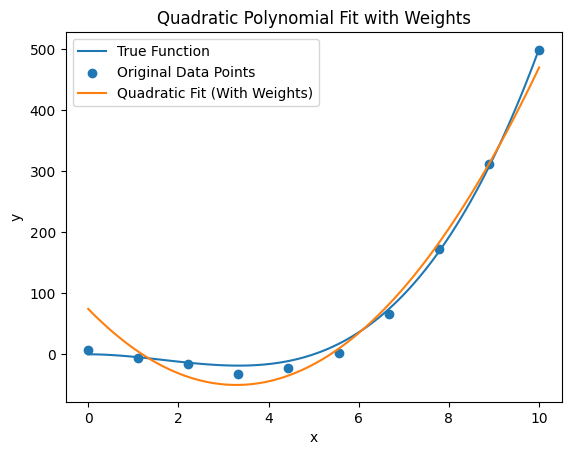

In [10]:
# prompt: repeat the polyfit with a quadratic using the weights

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'data' and 'table_data' are defined as in the preceding code

x = table_data[:, 0]
y_mean = table_data[:, 1]
y_std = table_data[:, 2]

# Quadratic polynomial fit with weights (using 1/std_dev as weight)
weights = 1 / y_std
coeffs_with_weights = np.polyfit(x, y_mean, 2, w=weights)
polynomial_with_weights = np.poly1d(coeffs_with_weights)

# Define the true function
def true_function(x):
  return x**3 - 5*x**2

# Generate x values for plotting
x_plot = np.linspace(0, 10, 100)

# Calculate the true function values
y_true = true_function(x_plot)

# Calculate the polynomial values for plotting
y_with_weights = polynomial_with_weights(x_plot)

# Plot the true function, original points, and both polynomials
plt.plot(x_plot, y_true, label='True Function')
plt.scatter(x, y_mean, label='Original Data Points')
plt.plot(x_plot, y_with_weights, label='Quadratic Fit (With Weights)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Polynomial Fit with Weights')
plt.legend()
plt.show()
